In [2]:
import sys
from pathlib import Path

sys.path.insert(0,str(Path(r'C:\Users\ku51015\CHMURA\mystuff\Graph-Vizualisation-Rating-Metric').resolve()))

from graph_generating_script import *
from graph_metric_script import *
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
import pickle

In [49]:
# example_posdf = pd.read_csv(r'pos_dfs\0_circular_layout.csv')
# with open('graph_objects\graph_0.pkl', 'rb') as f:
#     G = pickle.load(f)

In [50]:
# zrobic df gdzie jest: graph_id+layout(czyli nazwa pliku), score, i oliczone wartosci kazdego z komponentow

# MAIN LOOP

In [4]:
annotations = pd.read_excel('SBM_annotations_scores.xlsx')

In [5]:
import os 
posdf_dir = 'pos_dfs'
graph_dir = 'graph_objects'


calculated_components_df = pd.DataFrame(columns=['posdf_id', 'score', 'node_distribution', 'distance_to_borderlines', 'edge_length_sum', 'edge_node_distance_contribution', 'count_edge_crossings'])

# Iterate through files in the posdf_dir
for posdf_file in os.listdir(posdf_dir):
    # reading data
    if posdf_file.endswith('.csv'):
        posdf = pd.read_csv(os.path.join(posdf_dir, posdf_file))
        print(f'Loaded {posdf_file}')

    graph_id = posdf_file.split('_')[0]
    layout = posdf_file.split('.')[0]
    layout = layout[2:]
    score = annotations[annotations['graph_id'] == int(graph_id)][layout].values[0]


    graph_file = 'graph_'+graph_id+'.pkl' 
    with open(os.path.join(graph_dir, graph_file), 'rb') as f:
        G = pickle.load(f)
    components_dict = {
        'posdf_id': posdf_file,
        'score': score,
        'node_distribution': node_distribution(posdf),
        'distance_to_borderlines': distance_to_borderlines(posdf),
        'edge_length_sum': edge_length_sum(G, posdf),
        'edge_node_distance_contribution': edge_node_distance_contribution(G, posdf)[0],
        'count_edge_crossings': count_edge_crossings(G, posdf)
    }
    new_row_df = pd.DataFrame([components_dict])
    calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)

Loaded 0_davidson_harel.csv
Loaded 0_graphopt.csv
Loaded 0_kamada_kawai.csv
Loaded 0_lgl.csv
Loaded 0_random.csv
Loaded 1_davidson_harel.csv
Loaded 1_graphopt.csv


C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_15888\4057074412.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calculated_components_df = pd.concat([calculated_components_df, new_row_df], ignore_index=True)


Loaded 1_kamada_kawai.csv
Loaded 1_lgl.csv
Loaded 1_random.csv
Loaded 2_davidson_harel.csv
Loaded 2_graphopt.csv
Loaded 2_kamada_kawai.csv
Loaded 2_lgl.csv
Loaded 2_random.csv
Loaded 3_davidson_harel.csv
Loaded 3_graphopt.csv
Loaded 3_kamada_kawai.csv
Loaded 3_lgl.csv
Loaded 3_random.csv
Loaded 4_davidson_harel.csv
Loaded 4_graphopt.csv
Loaded 4_kamada_kawai.csv
Loaded 4_lgl.csv
Loaded 4_random.csv
Loaded 5_davidson_harel.csv
Loaded 5_graphopt.csv
Loaded 5_kamada_kawai.csv
Loaded 5_lgl.csv
Loaded 5_random.csv
Loaded 6_davidson_harel.csv
Loaded 6_graphopt.csv
Loaded 6_kamada_kawai.csv
Loaded 6_lgl.csv
Loaded 6_random.csv


In [6]:
calculated_components_df

,posdf_id,score,node_distribution,distance_to_borderlines,edge_length_sum,edge_node_distance_contribution,count_edge_crossings
0,0_davidson_harel.csv,4.0,4.097682,1445.033,2.209120e+02,3.756827e+01,144
1,0_graphopt.csv,3.0,0.034121,0.772,2.591696e+04,1.538898e+02,144
2,0_kamada_kawai.csv,5.0,112.121401,10021.539,5.977217e+00,8.841072e+02,64
3,0_lgl.csv,1.0,0.000088,0.000,1.515563e+13,2.616707e+01,100
4,0_random.csv,2.0,266.045170,1191.904,9.824720e+00,1.070991e+04,3136
5,1_davidson_harel.csv,3.0,4.591858,10.210,9.173483e+02,5.389927e+02,576
6,1_graphopt.csv,4.0,0.046798,0.092,1.057003e+05,2.275763e+02,784
7,1_kamada_kawai.csv,5.0,284.915246,10065.815,5.332479e+00,6.913793e+03,81
8,1_lgl.csv,1.0,8.889793,0.000,2.318329e+13,2.012916e+02,1089
9,1_random.csv,2.0,1134.559775,418.294,5.883049e+00,5.556438e+04,2116


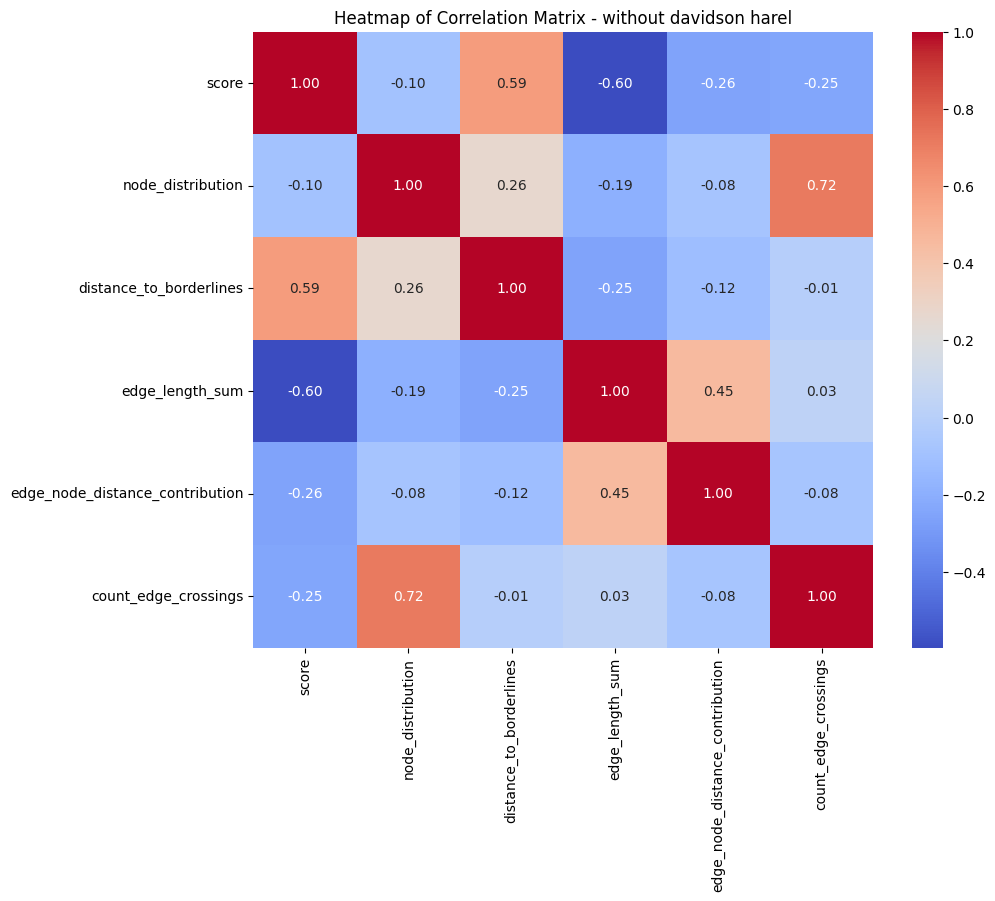

In [7]:
# Calculate the correlation matrix
import seaborn as sns

calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix - without davidson harel')
plt.show()

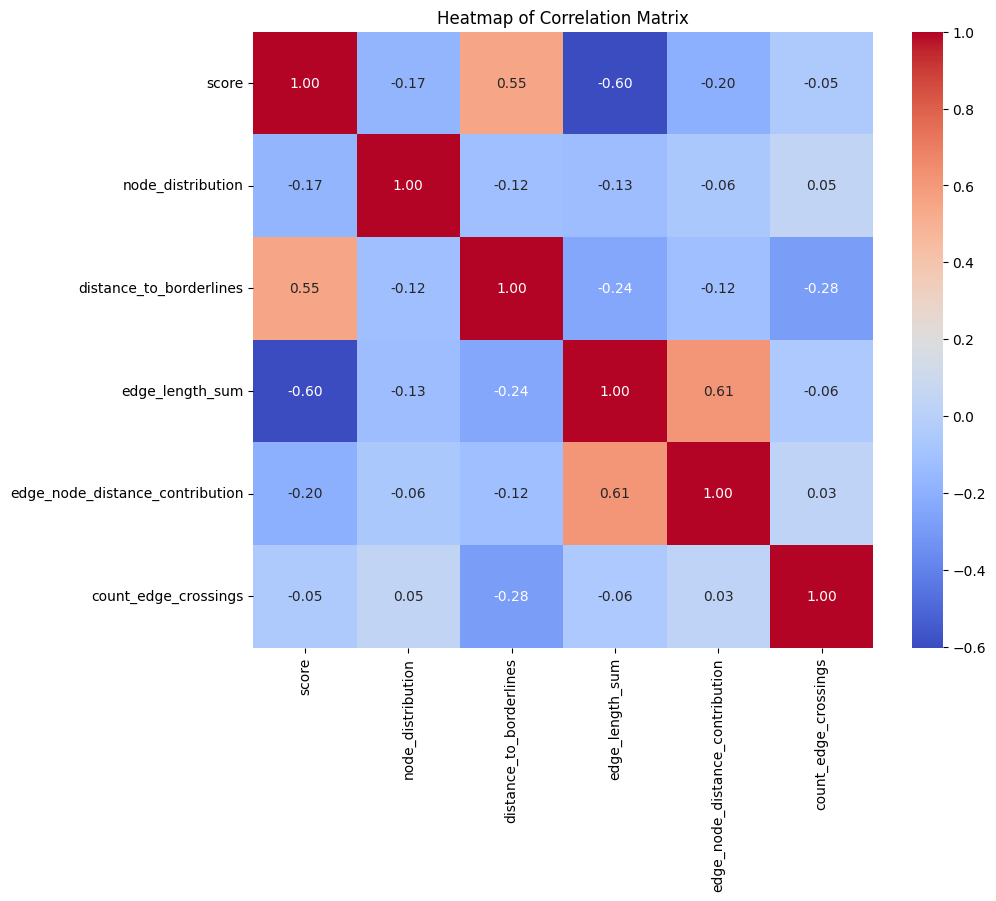

In [5]:
# Calculate the correlation matrix
# with davidson harel
import seaborn as sns

calculated_components_df_numeric = calculated_components_df.drop(columns=['posdf_id'])
correlation_matrix = calculated_components_df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()